# LIWC

Analyze letters with LIWC (Linguistic Inquiry and Word Count) (Pennebaker et al., 2007).

In [1]:
import os
import re
import sys

from IPython.display import clear_output

In [2]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

## 1. Read files

In [3]:
FILE_DIR = "../letters/"

def read_file(in_file_id):
    try:
        in_file = open(f"{FILE_DIR}{in_file_id}.txt", "r")
    except:
        sys.exit(f"cannot open {FILE_DIR}{in_file_id}.txt")
    text = ""
    for line in in_file:
        text += line.strip() + " "
    in_file.close()
    return text.strip()

In [4]:
def read_all_texts(file_dir):
    file_names = sorted(os.listdir(file_dir))
    texts = []
    for file_name in file_names:
        if re.search(r"\.txt$", file_name):
            letter_id = re.sub(r"\.txt$", "", file_name)
            squeal(letter_id)
            text = read_file(letter_id)
            texts.append(text)
    return texts

In [5]:
texts = read_all_texts(FILE_DIR)

21


## 2. LIWC

In [6]:
import matplotlib.pyplot as plt
sys.path.append("/home/erikt/projects/e-mental-health/data-processing/")
import tactus2liwc_nl as liwc

In [13]:
LIWCDIR = "/home/erikt/projects/e-mental-health/liwc/"
LIWCFILE = "Dutch_LIWC2015_Dictionary.dic"

def apply_liwc_to_texts(texts):
    liwc_feature_names, liwc_words, liwc_prefixes = liwc.readLiwcDict(LIWCDIR+LIWCFILE)
    liwc_results = []
    for text in texts:
        text_tokens, _text_nbr_of_sents = liwc.tokenize(text)
        text_results = liwc.text2liwc(liwc_words, liwc_prefixes, text_tokens)
        liwc_results.append(text_results)
    return liwc_results, liwc_feature_names

In [14]:
def liwc_result_to_freqs(liwc_result, liwc_feature_names):
    liwc_freqs = {}
    for key in liwc_feature_names:
        if key not in liwc_result:
            liwc_freqs[key] = 0
        else:
            liwc_freqs[key] = liwc_result[key] / liwc_result['NBROFMATCHES']
    return liwc_freqs

In [9]:
def show_liwc_graph(liwc_freqs, text_id):
    x = [ int(key) for key in sorted(liwc_freqs.keys(), key=lambda key:int(key)) ] 
    y = [ liwc_freqs[key] for key in sorted(liwc_freqs.keys(), key=lambda key:int(key)) ]
    plt.figure(figsize=(6,2))
    plt.bar(x, y)
    plt.title(f"text {text_id}")
    plt.show()

In [41]:
def show_liwc_top(liwc_freqs, average_freqs, n=10):
    x = [ int(key) for key in sorted(liwc_freqs.keys(), key=lambda key:liwc_freqs[key], reverse=True) ]
    y = [ liwc_freqs[key] for key in sorted(liwc_freqs.keys(), key=lambda key:liwc_freqs[key], reverse=True) ]
    z = [ average_freqs[key] for key in sorted(liwc_freqs.keys(), key=lambda key:liwc_freqs[key], reverse=True) ]
    z = [ y[i] - z[i] for i in range(0, len(z)) ]
    x = [ x[i] for i in sorted(range(0, len(z)), key=lambda k:z[k], reverse=True)]
    y = [ y[i] for i in sorted(range(0, len(z)), key=lambda k:z[k], reverse=True)]
    z = [ z[i] for i in sorted(range(0, len(z)), key=lambda k:z[k], reverse=True)]
    
    for i in range(0, n):
        print(f"{i+1:2}. {y[i]:0.2f} {z[i]:5.2f} {liwc_feature_names[str(x[i])]}")
    print("")    

In [21]:
def compute_average_freqs(liwc_result, liwc_feature_names):
    freqs_lists = []
    for liwc_result in liwc_results:
        freqs_lists.append(liwc_result_to_freqs(liwc_result, liwc_feature_names))
    average_freqs = {}
    for liwc_feature_name in liwc_feature_names:
        total_freq = 0
        for freqs_list in freqs_lists:
            if liwc_feature_name in freqs_list:
                total_freq += freqs_list[liwc_feature_name]
        average_freqs[liwc_feature_name] = total_freq / len(freqs_lists)
    return average_freqs

In [35]:
N = 10

def show_results(liwc_results, liwc_feature_names, n=N):
    text_id = 0
    average_freqs = compute_average_freqs(liwc_results, liwc_feature_names)
    for liwc_result in liwc_results:
        text_id += 1
        liwc_freqs = liwc_result_to_freqs(liwc_result, liwc_feature_names)
        show_liwc_graph(liwc_freqs, text_id)
        show_liwc_top(liwc_freqs, average_freqs, n=n)

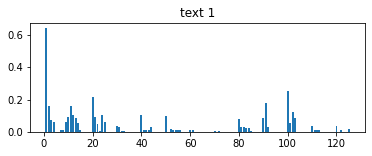

 1. 0.25  0.06 relativ
 2. 0.06  0.04 i
 3. 0.13  0.03 space
 4. 0.06  0.02 quant
 5. 0.06  0.02 motion
 6. 0.08  0.02 time
 7. 0.04  0.01 work
 8. 0.18  0.01 focuspresent
 9. 0.21  0.01 verb
10. 0.03  0.01 male



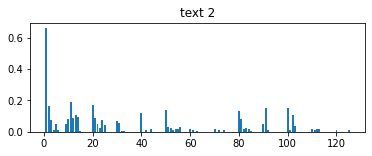

 1. 0.13  0.05 drives
 2. 0.08  0.04 affiliation
 3. 0.05  0.03 we
 4. 0.19  0.02 prep
 5. 0.05  0.02 posemo
 6. 0.07  0.02 affect
 7. 0.12  0.02 social
 8. 0.11  0.01 space
 9. 0.01  0.01 friend
10. 0.66  0.01 function



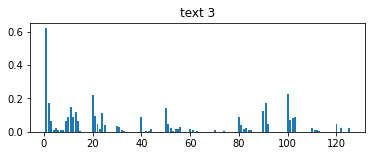

 1. 0.12  0.04 focuspast
 2. 0.07  0.04 motion
 3. 0.23  0.04 relativ
 4. 0.05  0.02 focusfuture
 5. 0.09  0.02 time
 6. 0.22  0.02 verb
 7. 0.12  0.02 number
 8. 0.02  0.02 netspeak
 9. 0.05  0.02 insight
10. 0.05  0.01 informal



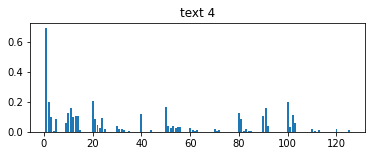

 1. 0.09  0.06 we
 2. 0.09  0.05 affiliation
 3. 0.12  0.04 drives
 4. 0.69  0.04 function
 5. 0.13  0.03 article
 6. 0.20  0.03 pronoun
 7. 0.10  0.03 ppron
 8. 0.11  0.03 focuspast
 9. 0.17  0.02 cogproc
10. 0.11  0.02 space



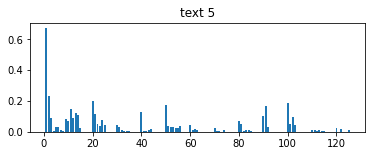

 1. 0.23  0.06 pronoun
 2. 0.17  0.03 cogproc
 3. 0.13  0.03 social
 4. 0.10  0.03 focuspast
 5. 0.03  0.02 you
 6. 0.67  0.02 function
 7. 0.04  0.02 percept
 8. 0.05  0.02 motion
 9. 0.12  0.02 adj
10. 0.11  0.02 conj



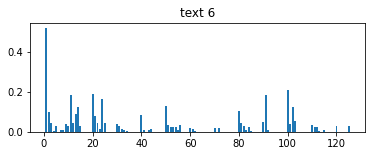

 1. 0.16  0.06 number
 2. 0.12  0.03 conj
 3. 0.12  0.03 space
 4. 0.10  0.02 drives
 5. 0.19  0.02 prep
 6. 0.19  0.02 focuspresent
 7. 0.21  0.02 relativ
 8. 0.03  0.01 negate
 9. 0.04  0.01 work
10. 0.02  0.01 home



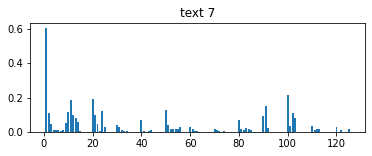

 1. 0.12  0.02 number
 2. 0.11  0.02 article
 3. 0.21  0.02 relativ
 4. 0.18  0.02 prep
 5. 0.11  0.02 space
 6. 0.09  0.01 focuspast
 7. 0.08  0.01 time
 8. 0.03  0.01 work
 9. 0.02  0.01 home
10. 0.04  0.01 insight



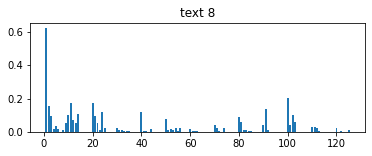

 1. 0.04  0.02 bio
 2. 0.06  0.02 affiliation
 3. 0.09  0.02 ppron
 4. 0.11  0.02 conj
 5. 0.12  0.02 number
 6. 0.03  0.02 leisure
 7. 0.12  0.02 social
 8. 0.02  0.02 ingest
 9. 0.02  0.02 body
10. 0.03  0.02 home



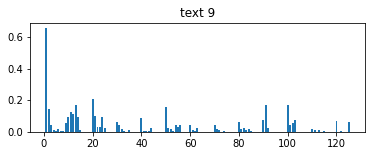

 1. 0.17  0.06 adverb
 2. 0.06  0.04 filler
 3. 0.07  0.04 informal
 4. 0.04  0.02 bio
 5. 0.04  0.02 tentat
 6. 0.06  0.02 affect
 7. 0.04  0.02 percept
 8. 0.02  0.02 feel
 9. 0.11  0.02 auxverb
10. 0.05  0.02 posemo



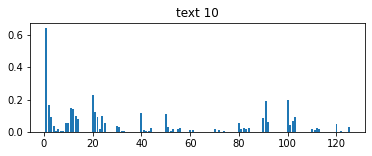

 1. 0.14  0.05 auxverb
 2. 0.09  0.04 compare
 3. 0.06  0.03 focusfuture
 4. 0.12  0.03 adj
 5. 0.23  0.03 verb
 6. 0.19  0.02 focuspresent
 7. 0.09  0.02 time
 8. 0.04  0.02 i
 9. 0.09  0.02 ppron
10. 0.12  0.02 social



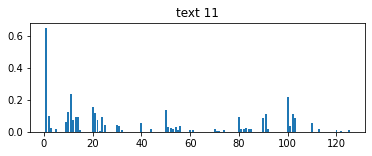

 1. 0.24  0.07 prep
 2. 0.12  0.03 article
 3. 0.05  0.03 work
 4. 0.22  0.03 relativ
 5. 0.07  0.02 compare
 6. 0.09  0.02 time
 7. 0.12  0.02 adj
 8. 0.11  0.01 space
 9. 0.02  0.01 risk
10. 0.02  0.01 money



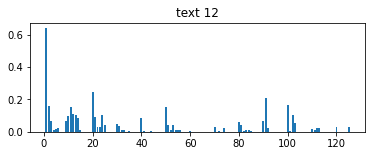

 1. 0.24  0.04 verb
 2. 0.21  0.04 focuspresent
 3. 0.04  0.02 discrep
 4. 0.02  0.01 home
 5. 0.02  0.01 ingest
 6. 0.11  0.01 auxverb
 7. 0.03  0.01 interrog
 8. 0.11  0.01 space
 9. 0.04  0.01 insight
10. 0.02  0.01 money



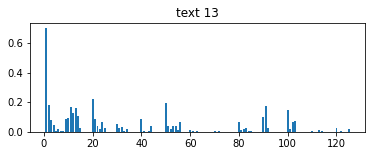

 1. 0.20  0.05 cogproc
 2. 0.16  0.05 adverb
 3. 0.70  0.05 function
 4. 0.07  0.03 differ
 5. 0.04  0.03 i
 6. 0.12  0.03 auxverb
 7. 0.10  0.02 focuspast
 8. 0.22  0.02 verb
 9. 0.03  0.02 negemo
10. 0.04  0.02 discrep



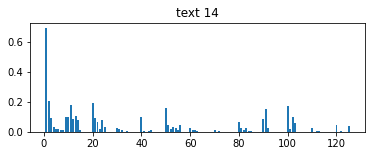

 1. 0.69  0.04 function
 2. 0.20  0.04 pronoun
 3. 0.10  0.03 ipron
 4. 0.09  0.02 ppron
 5. 0.03  0.02 i
 6. 0.05  0.02 insight
 7. 0.06  0.01 compare
 8. 0.04  0.01 filler
 9. 0.16  0.01 cogproc
10. 0.18  0.01 prep



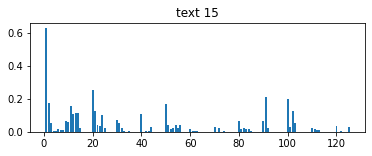

 1. 0.26  0.06 verb
 2. 0.21  0.05 focuspresent
 3. 0.13  0.03 space
 4. 0.07  0.03 affect
 5. 0.12  0.03 conj
 6. 0.13  0.03 adj
 7. 0.17  0.02 cogproc
 8. 0.05  0.02 posemo
 9. 0.04  0.02 tentat
10. 0.03  0.02 health



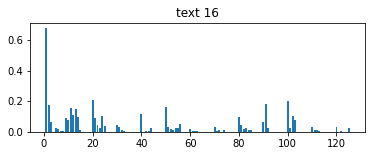

 1. 0.15  0.04 adverb
 2. 0.68  0.03 function
 3. 0.09  0.02 ipron
 4. 0.16  0.02 cogproc
 5. 0.18  0.02 focuspresent
 6. 0.10  0.02 drives
 7. 0.12  0.02 social
 8. 0.05  0.01 differ
 9. 0.11  0.01 auxverb
10. 0.18  0.01 pronoun



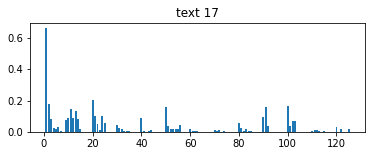

 1. 0.14  0.03 adverb
 2. 0.06  0.02 quant
 3. 0.10  0.02 focuspast
 4. 0.18  0.02 pronoun
 5. 0.16  0.01 cogproc
 6. 0.03  0.01 you
 7. 0.66  0.01 function
 8. 0.04  0.01 focusfuture
 9. 0.05  0.01 differ
10. 0.02  0.01 netspeak



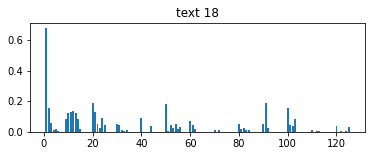

 1. 0.07  0.05 percept
 2. 0.18  0.04 cogproc
 3. 0.13  0.04 auxverb
 4. 0.04  0.03 see
 5. 0.12  0.03 article
 6. 0.13  0.03 adj
 7. 0.05  0.03 tentat
 8. 0.68  0.03 function
 9. 0.04  0.02 cause
10. 0.19  0.02 focuspresent



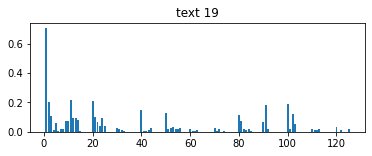

 1. 0.70  0.05 function
 2. 0.22  0.05 prep
 3. 0.15  0.05 social
 4. 0.20  0.04 pronoun
 5. 0.08  0.04 affiliation
 6. 0.06  0.03 we
 7. 0.10  0.03 ppron
 8. 0.11  0.03 drives
 9. 0.12  0.03 space
10. 0.04  0.02 interrog



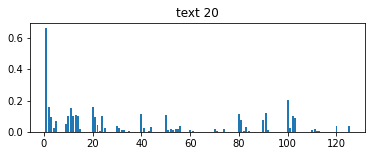

 1. 0.07  0.04 we
 2. 0.08  0.04 affiliation
 3. 0.11  0.03 drives
 4. 0.10  0.02 ppron
 5. 0.03  0.02 family
 6. 0.09  0.02 time
 7. 0.20  0.01 relativ
 8. 0.12  0.01 social
 9. 0.03  0.01 power
10. 0.66  0.01 function



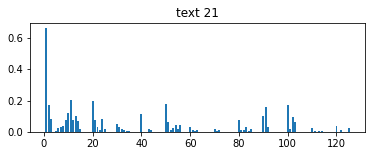

 1. 0.20  0.04 prep
 2. 0.12  0.03 article
 3. 0.06  0.03 insight
 4. 0.04  0.03 they
 5. 0.18  0.03 cogproc
 6. 0.03  0.02 shehe
 7. 0.10  0.02 focuspast
 8. 0.04  0.02 tentat
 9. 0.03  0.01 power
10. 0.02  0.01 female



In [42]:
liwc_results, liwc_feature_names = apply_liwc_to_texts(texts)
show_results(liwc_results, liwc_feature_names)